# Global Superstore sales EDA & Visualization

This is my first data analysis project. In this project I will try to dive into a dataset called global-superstore. It is well known dataset for beginner projects. I found this dataset on kaggle. I will be using python libraries such as opendatasets ,Numpy, Pandas, Matplotlib and seaborn for data importing, data wrangling, numerical computation and data visualization. I will try to use the skills I have developed over last few weeks to try to analyze this dataset and draw some inferences. 

## Downloading the Dataset

We will use the python library opendatasets for downloading the dataset file from kaggle into our directory. 

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# storing the URL of the dataset into dataset_url variable
dataset_url = 'https://www.kaggle.com/datasets/shekpaul/global-superstore' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in ".\global-superstore" (use force=True to force download)


The dataset has been downloaded and extracted.

In [4]:
# storing the location of data in data_dir variable
data_dir = './global-superstore'

In [5]:
import os
os.listdir(data_dir)

['Global Superstore.xls']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "global-superstore-sales-analysis-visualization" 

## Data Preparation and Cleaning

importing the libraries such as numpy and pandas, provided by python for numerical computation and data manipulation.
using these libraries we will deal with missing values, inconsistent data, duplicated values, wrong datatypes. We will parse date columns using pandas. 




In [10]:
import numpy as np
import pandas as pd

In [11]:
# using the read_excel function of pandas to read the data into a pandas dataframe. 
#using Parse_dates argument to tell pandas which columns contain dates
data = pd.read_excel(data_dir + '/Global Superstore.xls', sheet_name='Orders', parse_dates=['Order Date', 'Ship Date'])

In [12]:
#this will show first few rows of the dataframe
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


The dataset has been succefully imported into the dataframe. 

In [13]:
#this shows number of rows and columns in dataframe
data.shape

(51290, 24)

As we can see our dataset has 24 columns and 51290 rows. 

In [14]:
#this shows various different columns in dataframe
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

These are the various columns from the dataset. 

 .info method of a dataframe returns the value counts of the various dataframe columns as well as their datatypes. 

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [16]:
# checking to see if there are any missing values in the dataset. 
data.isna().any()

Row ID            False
Order ID          False
Order Date        False
Ship Date         False
Ship Mode         False
Customer ID       False
Customer Name     False
Segment           False
City              False
State             False
Country           False
Postal Code        True
Market            False
Region            False
Product ID        False
Category          False
Sub-Category      False
Product Name      False
Sales             False
Quantity          False
Discount          False
Profit            False
Shipping Cost     False
Order Priority    False
dtype: bool

In [17]:
#getting count of missing values in each column
data.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [18]:
#checking to see if there are any duplicated rows in dataset
data[data.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority


The dataset does not have any duplicated rows. 

In [19]:
#dropping the postal code column
data.drop('Postal Code', axis=1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.570,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.630,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.160,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.010,Medium
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.010,Medium
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.010,High
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.003,Medium


In [20]:
#extracting the year of every order and adding it to the new column in dataframe as "Order Year"
data['Order Year'] = data['Order Date'].dt.year
data['Order Year']

0        2012
1        2013
2        2013
3        2013
4        2013
         ... 
51285    2014
51286    2014
51287    2013
51288    2012
51289    2012
Name: Order Year, Length: 51290, dtype: int64

In [21]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Order Year'],
      dtype='object')

Extracting the year in which every order was placed from the Order Date column and adding it to the new column "Order year"
this will later help us when grouping the various columns on the year basis. 

In [173]:
#subtracting ship date from order date so we can see how much time it takes for order to ship. 
data['Shipping duration'] = (data['Ship Date'] - data['Order Date']).dt.days
data['Shipping duration']

0        0
1        2
2        1
3        2
4        1
        ..
51285    0
51286    4
51287    0
51288    4
51289    4
Name: Shipping duration, Length: 51290, dtype: int64

We have the order date and ship data. so using this we computed how many days it took for the order to get shipped.

In [178]:
#setting date as the index of the dataframe with set_index() method and sorting the dates with sort_index() method
data_sorted = data.set_index('Order Date').sort_index()
data_sorted

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Shipping duration
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01-01,48883,HU-2011-1220,2011-01-05,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,...,Storage,"Tenex Box, Single Width",66.1200,4,0.00,29.6400,8.170,High,2011,4
2011-01-01,22253,IN-2011-47883,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,...,Supplies,"Acme Trimmer, High Speed",120.3660,3,0.10,36.0360,9.720,Medium,2011,7
2011-01-01,42433,AG-2011-2040,2011-01-06,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,...,Storage,"Tenex Lockers, Blue",408.3000,2,0.00,106.1400,35.460,Medium,2011,5
2011-01-01,22254,IN-2011-47883,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,...,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.2420,2,0.10,15.3420,1.800,Medium,2011,7
2011-01-01,11731,IT-2011-3647632,2011-01-05,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,...,Paper,"Enermax Note Cards, Premium",44.8650,3,0.50,-26.0550,4.820,High,2011,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31,8857,MX-2014-110527,2015-01-02,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,...,Labels,"Hon Color Coded Labels, 5000 Label Set",26.4000,3,0.00,12.3600,0.350,Medium,2014,2
2014-12-31,26333,IN-2014-30390,2015-01-03,First Class,JD-16150,Justin Deggeller,Corporate,Bangkok,Bangkok,Thailand,...,Tables,"Lesro Training Table, Adjustable Height",1048.7313,9,0.57,-1195.2387,86.860,High,2014,3
2014-12-31,50446,TZ-2014-8350,2015-01-03,First Class,JA-5970,Joseph Airdo,Consumer,Dar es Salaam,Dar Es Salaam,Tanzania,...,Storage,"Fellowes Folders, Wire Frame",22.9230,1,0.10,4.0530,6.110,High,2014,3


Using the set_index method I set Order Date column as the index the dataframe. 
Then using the sort_index method sorted the Order Dates From earliest to latest. 

The dataset if cleaned, validated and ready to be explored. 

## Exploratory Analysis and Visualization

Now we will start exploring the data. We will do statistical as well as visual exploration of the data and try to find some pattern, trends and insights. I will be using the python graphing libaries matplotlib and seaborn for creating some visuals from the data. 


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [25]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Let's determine the time range of the data

In [26]:
#using min function to get earliest date
print(data_sorted.index.min())

2011-01-01 00:00:00


In [27]:
#using max function to get latest entry in data
print(data_sorted.index.max())

2014-12-31 00:00:00


So as we can see the data ranges for exactly four years from 1 January 2011 to 31 december 2014. 

**Let's explore some of the columns to see how many unique fields they contain. 
we will define a function unique_values which will take a list of column names as a positional argument and print the 
unique values and the no. of unique values in each column.**

In [28]:
def unique_values(column_names_list):
    for column in column_names_list:
        print(data_sorted[column].unique())
        print("The number of unique", column , "in column:" , data_sorted[column].nunique())
        print('\n')
    

In [29]:
#defining a list of columns that we are interested in
list_of_columns = ['Country','Region', 'Category', 'Sub-Category', 'Segment', 'Market']

In [30]:
unique_values(list_of_columns)

['Hungary' 'Australia' 'Algeria' 'Sweden' 'Canada' 'United Kingdom'
 'New Zealand' 'Iran' 'Guatemala' 'Tanzania' 'Iraq' 'Philippines'
 'Thailand' 'Malaysia' 'Brazil' 'Cuba' 'Japan' 'Mexico' 'Sudan'
 'United States' 'France' 'Taiwan' 'Indonesia' 'Vietnam' 'China' 'Angola'
 'Lebanon' 'Mozambique' 'Singapore' 'Netherlands' 'Nigeria' 'South Africa'
 'Egypt' 'Venezuela' 'Austria' 'India' 'Spain' 'Turkey' 'Italy' 'Germany'
 'Nicaragua' 'Dominican Republic' 'Denmark' 'El Salvador' 'Saudi Arabia'
 'Zambia' 'Myanmar (Burma)' 'Russia' 'Mongolia' 'Kenya' 'Belgium'
 'Colombia' 'Estonia' 'Madagascar' 'Morocco' 'Norway' 'Portugal'
 'Sierra Leone' 'Czech Republic' 'Central African Republic' 'Benin'
 'Bangladesh' 'Panama' 'Chile' 'South Korea' 'Moldova' 'Switzerland'
 'Uganda' 'Zimbabwe' 'Senegal' 'Hong Kong' 'Niger'
 'Democratic Republic of the Congo' 'Poland' 'Ireland' 'Pakistan'
 'Azerbaijan' 'Ukraine' 'Romania' 'Honduras' 'Israel' 'Albania' 'Cameroon'
 'Cambodia' 'Georgia' 'Argentina' 'Finland' 'L

- we can see there's quite a lot of location diversity in our dataset. 
- The Product orders span across 147 different  countries. 
- The countries are divided into 13 regions.
- The products are classified into 3 main categories which are further classified into 17 Sub-Categories. 
- The customers are divided into 3 segments. 

**Now let's compute some summary statistics of the numerical variables in the data**

The .describe() method returns the various summary statistics of the data. 

In [31]:
data_sorted.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost,Order Year,Shipping duration
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375818,2012.777208,3 days 23:15:53.589393644
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296810,1.098931,1 days 17:30:23.320880732
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000,0 days 00:00:00
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000,3 days 00:00:00
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000,4 days 00:00:00
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000,5 days 00:00:00
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000,7 days 00:00:00


As expected it seems like there's quite a lot of skew in the data. The values of the Mean and median are huge differences for various columns. 

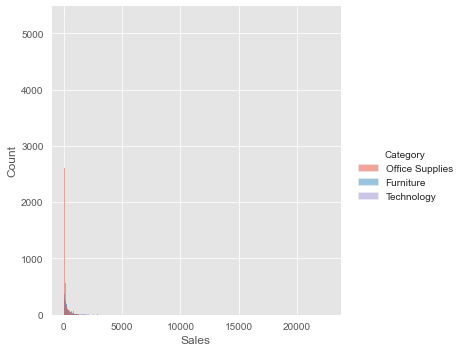

In [32]:
#setting style of plot
plt.style.use('ggplot')


#using seaborn's displot function to plot histogram of Sales variable
sns.displot(data=data_sorted, x='Sales', hue='Category');

As we can see the data for sales column is quite heavily tailed to the right. we will have to transform the data to look at the real distribution of sales variable. Let's use Log scale of the x-axis to observe the distribution. 

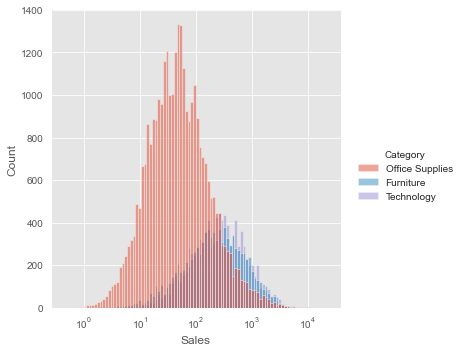

In [33]:
#defining scale to be logarithmic and hue parameter to be categories so we can see distribution of sales across product categories. 
sns.displot(data=data_sorted, x='Sales', log_scale=True, hue='Category', alpha=0.5);

So as we can see the variable sales has Log Normal distribution. Most of the data points seem to be situated between range of 10 and 100. 

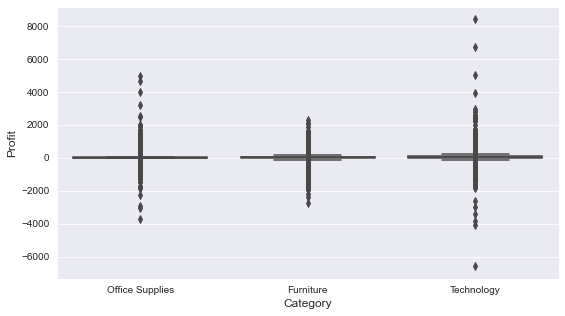

In [34]:
#lets explore the Profit column
#we will use seaborn library to plot a boxplot of profit column.
sns.set_style('darkgrid')
sns.boxplot(data=data_sorted, y='Profit', x='Category');

The values in profit column are highly concentraded close to zero. There are some outliers values both negative and positive. Lets try to look at the distribution by removing outliers. 

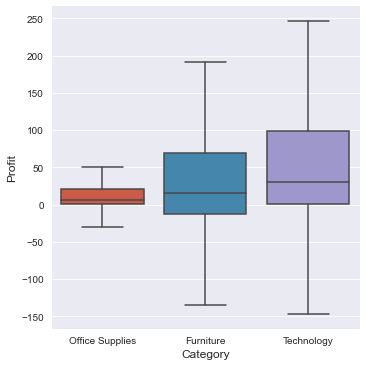

In [35]:
#by passing the sym keyword argument as empty string seaborn will understand that we want to omit the outliers from the plot
sns.catplot(data=data_sorted, y='Profit', kind='box', x='Category', sym="");

Here we can see that without outliers the distribution of profit is very much normal. The office supplies range looks like it is smaller compared to other two categories which might be due to the rates of the products. 

Let's explore the number of orders across various variables. 

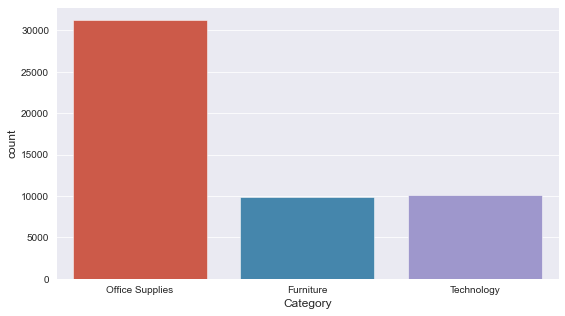

In [36]:
sns.countplot(data=data_sorted, x='Category');

This shows that substantial amount of orders are for office supplies. In fact we can see the orders for office supplies are more than ordersf or furniture and technology combined 

Let's further look at the distribution of orders among sub categories. 

In [37]:
data_sorted.groupby(['Category','Sub-Category'])['Sales'].count()

Category         Sub-Category
Furniture        Bookcases       2411
                 Chairs          3434
                 Furnishings     3170
                 Tables           861
Office Supplies  Appliances      1755
                 Art             4883
                 Binders         6152
                 Envelopes       2435
                 Fasteners       2420
                 Labels          2606
                 Paper           3538
                 Storage         5059
                 Supplies        2425
Technology       Accessories     3075
                 Copiers         2223
                 Machines        1486
                 Phones          3357
Name: Sales, dtype: int64

Here we can see The count of orders by Categories further divided in sub-categories. But it's hard to look at any trend this way. SO let's visualize it using seaborns catplot function

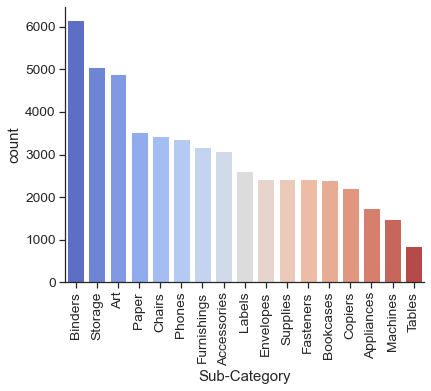

In [38]:


sns.set_theme(style="ticks", font_scale=1.25)

g = sns.catplot(data=data_sorted, x='Sub-Category', 
            kind='count', 
            order=data_sorted['Sub-Category'].value_counts().index,
            palette='coolwarm')

g.fig.set_size_inches(6.5, 4.5)

plt.xticks(rotation=90);

As expected the Sub-categories belonging to the Office supplies categories have higher sales. 

Let's look at the sales by year.

In [39]:
data_sorted.groupby('Order Year')['Sales'].sum()

Order Year
2011    2.259451e+06
2012    2.677439e+06
2013    3.405746e+06
2014    4.299866e+06
Name: Sales, dtype: float64

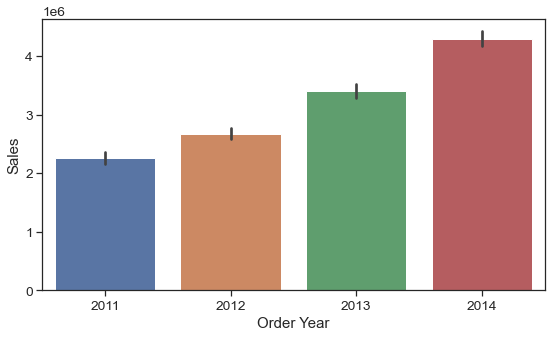

In [40]:

sns.barplot(data=data_sorted, x='Order Year', y='Sales', estimator=sum );

It looks like the sales have increased over the years. There seems to be a linear trend increase of the sales every year. 

Let us save and upload our work to Jovian before continuing

## Asking and Answering Questions

We have done some basic exploration of the dataset. Now let's dive deep and try to answer some question.



#### Q1: Which products categories are producting the most profit? 

We will use the groupby function of pandas to calculate profits acorss various categories of products. 

In [43]:
Profits = data_sorted.groupby(["Category", 'Sub-Category'], as_index=False) \
['Profit'].sum().sort_values('Profit', ascending=False)

In [44]:
Profits

,Category,Sub-Category,Profit
14,Technology,Copiers,258567.54818
16,Technology,Phones,216717.00580
0,Furniture,Bookcases,161924.41950
4,Office Supplies,Appliances,141680.58940
1,Furniture,Chairs,140396.26750
13,Technology,Accessories,129626.30620
11,Office Supplies,Storage,108461.48980
6,Office Supplies,Binders,72449.84600
10,Office Supplies,Paper,59207.68270
15,Technology,Machines,58867.87300


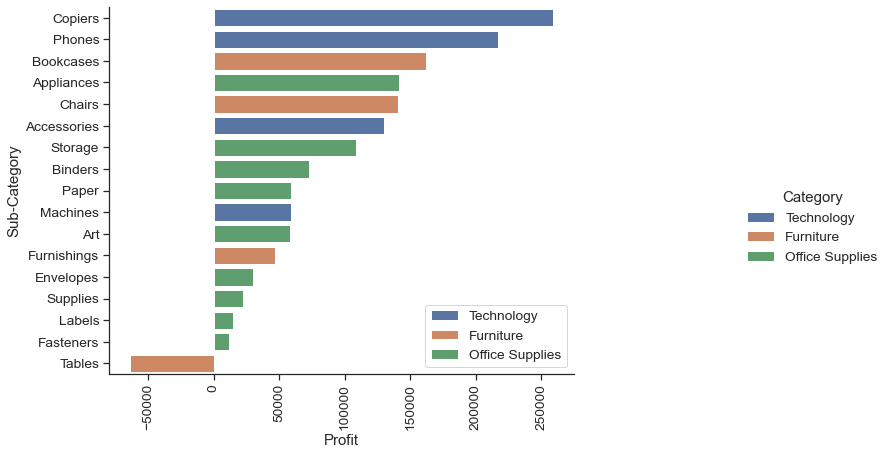

In [45]:
f = sns.catplot(data=Profits, 
            y='Sub-Category', x='Profit',
            kind='bar', hue='Category', dodge=False)

f.fig.set_size_inches(15, 6)

plt.xticks(rotation=90)

plt.legend(loc='lower right');

Interesting!! This plot shows us the profits by various subcategories of the products as well as which Major categories they belong to.
- It looks like The products from technology category are generating the most profit. 
- The Furniture category looks ilke it's not doing very well in the deparment of Tables. The plot shows the store is loosing money in Tables. 
- office supplies are generating moderate profit with no losses

#### Q2: Which are the top 10 countries in terms of sales and profits? 

In [77]:
Top_10 = data_sorted.groupby('Country', as_index=False)[['Sales','Profit']].sum().sort_values(by = "Sales", ascending=False).head(10)

In [78]:
Top_10

,Country,Sales,Profit
139,United States,2.297201e+06,286397.02170
6,Australia,9.252359e+05,103907.43300
44,France,8.589311e+05,109029.00300
26,China,7.005620e+05,150683.08500
47,Germany,6.288400e+05,107322.82050
81,Mexico,6.225906e+05,102818.09752
57,India,5.896501e+05,129071.83500
138,United Kingdom,5.285763e+05,111900.15000
58,Indonesia,4.048875e+05,15608.67790
17,Brazil,3.611064e+05,30090.49896


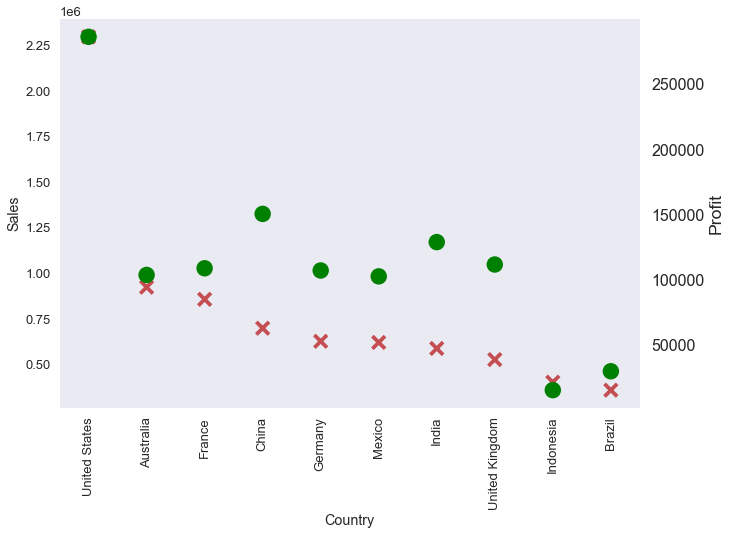

In [146]:

fig, ax = plt.subplots()

plt.style.use('seaborn-poster')

sns.pointplot(data=Top_10, x='Country', y="Sales", kind='point', ax=ax, markers='x', color='r', join=False)

ax2 = ax.twinx()

sns.pointplot(data=Top_10, x='Country', y='Profit', kind='point', ax=ax2, join=False, color='green')

ax2.grid(False)

ax.set_xticklabels(Top_10.Country, rotation=90);


In this plot we can see the Top 10 countries sales wise and how the sales relate to their profits. 
 
 - United states is by far the country with highest sales and profits both. 
 - Among other countries china and india seem to doing good in terms of profits to sales ratio. 

#### Q3: Is there a correlation order priority and shipping time?

In [179]:
data_sorted['Shipping duration']

Order Date
2011-01-01    4
2011-01-01    7
2011-01-01    5
2011-01-01    7
2011-01-01    4
             ..
2014-12-31    2
2014-12-31    3
2014-12-31    3
2014-12-31    2
2014-12-31    4
Name: Shipping duration, Length: 51290, dtype: int64

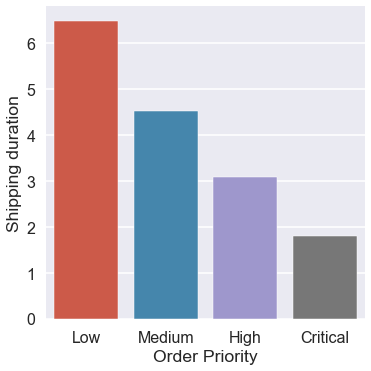

In [226]:
sns.catplot(data=data_sorted, 
            x='Order Priority', y='Shipping duration', 
            kind='bar', order=['Low', 'Medium', 'High', 'Critical'], 
            ci=False);

As expected the delivery time on average gets lower with higher priority of the order. 

#### Q4: Which products are in demand in which countries? 

for the simplicity we will consider only top 10 countries by sales 

In [191]:
top_10_country = list(Top_10.Country)
top_10_country

['United States',
 'Australia',
 'France',
 'China',
 'Germany',
 'Mexico',
 'India',
 'United Kingdom',
 'Indonesia',
 'Brazil']

In [195]:
data_top_10 = data_sorted[data_sorted['Country'].isin(top_10_country)]
data_top_10

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Shipping duration
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01-01,22253,IN-2011-47883,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.720,Medium,2011,7
2011-01-01,22254,IN-2011-47883,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,...,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.1,15.342,1.800,Medium,2011,7
2011-01-01,22255,IN-2011-47883,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.700,Medium,2011,7
2011-01-03,16385,ES-2011-4869686,2011-01-07,Standard Class,DD-13570,Dorothy Dickinson,Consumer,Southport,England,United Kingdom,...,Bookcases,"Dania Corner Shelving, Traditional",854.490,7,0.0,290.430,12.560,Medium,2011,4
2011-01-03,20302,IN-2011-79397,2011-01-03,Same Day,KN-16450,Kean Nguyen,Corporate,Sydney,New South Wales,Australia,...,Labels,"Avery Color Coded Labels, Laser Printer Compat...",35.883,3,0.1,4.743,7.460,Critical,2011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31,32594,CA-2014-115427,2015-01-04,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,United States,...,Binders,GBC Binding covers,20.720,2,0.2,6.475,2.060,Medium,2014,4
2014-12-31,1786,MX-2014-116267,2015-01-03,Second Class,EB-13975,Erica Bern,Corporate,São Paulo,São Paulo,Brazil,...,Accessories,"Enermax Memory Card, Erganomic",74.800,1,0.0,28.420,7.312,High,2014,3
2014-12-31,16469,ES-2014-3638865,2015-01-01,First Class,SV-20935,Susan Vittorini,Consumer,Worcester,England,United Kingdom,...,Storage,"Fellowes Shelving, Single Width",289.350,5,0.0,75.150,34.470,Critical,2014,1


In [198]:
top_10_country_vs_products = data_top_10.pivot_table(values='Sales', index='Country', columns='Sub-Category', aggfunc='sum')
top_10_country_vs_products

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Country,,,,,,,,,,,,,,,,,
Australia,55166.6880,94172.4990,15647.1390,16630.6320,127170.8370,142471.0140,138261.02700,12358.9080,7253.5920,24657.3780,6511.6740,45080.4300,17275.3950,101704.2990,55174.5540,20759.148,44940.6390
Brazil,20346.3880,28652.5040,5787.1240,5846.2760,55689.1640,55146.8760,54886.20296,6464.3000,2979.3800,12941.5280,2060.6520,8214.2120,5992.6120,44964.1600,18527.1400,6845.940,25761.9600
China,33029.3100,42119.2800,14069.3700,11430.7050,106034.2650,108831.4800,109251.15000,12166.5000,5535.9150,18132.6150,4468.1700,41903.9550,12585.7350,79330.5000,43739.1300,14320.725,43613.2200
France,49149.2700,78103.7310,47016.0300,33894.1950,95310.9360,91514.5680,95134.28700,10129.9200,6155.2350,22553.1900,4602.1050,77802.7740,12539.8200,89964.0870,96580.4820,15742.020,32738.4330
Germany,35566.7640,41873.1390,37413.6780,18917.7330,69342.9900,49819.6800,77091.33600,8500.7340,4709.3490,16705.8990,3457.4190,45006.7020,7685.5980,104591.1990,72657.2880,10735.644,24764.8785
India,33645.4650,45209.1900,7878.3750,9794.0250,88983.0000,68874.4200,70386.06000,9136.2150,4746.1200,16215.3600,3572.5950,33600.2700,12734.6100,104627.2350,27638.3550,10625.340,41983.4700
Indonesia,12366.8451,50057.7897,8742.3129,7298.1651,59808.5964,37654.5534,62119.65690,4376.2683,3036.8046,10071.7881,2046.2028,25854.7905,3906.9957,45730.5432,33787.9803,5525.250,32502.9549
Mexico,40153.6800,49545.5600,13187.6000,12690.5600,77313.4400,84392.0640,98952.93752,11673.8600,5627.7400,13228.5960,3875.7600,13829.4400,10028.8000,93231.2000,41959.0800,12108.140,40792.1600
United Kingdom,23617.5690,47980.9680,24973.8210,15753.2670,69866.8530,26873.1000,68430.11100,9096.2670,3704.1120,7181.8530,2599.5900,47051.5650,6153.5880,77649.2340,60306.7110,8798.469,28539.2220


<AxesSubplot:xlabel='Sub-Category', ylabel='Country'>

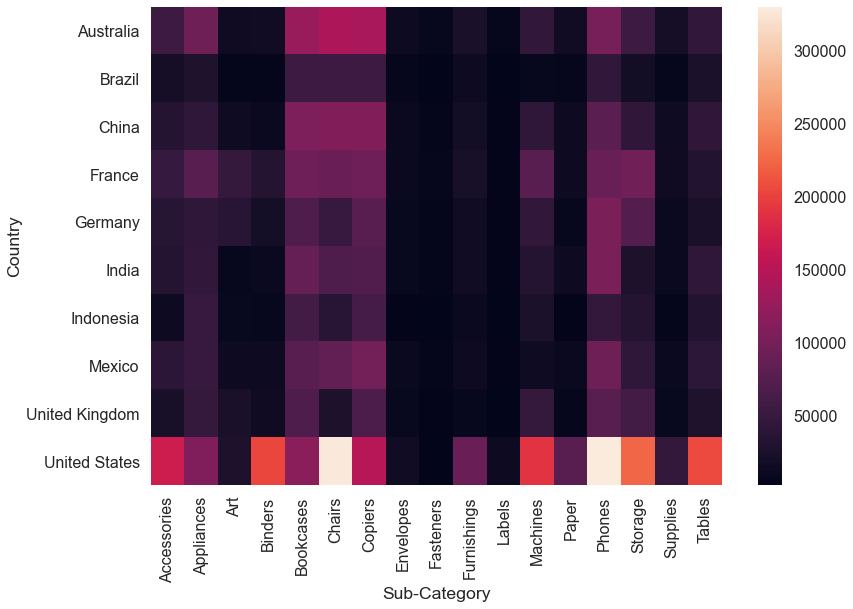

In [201]:
sns.heatmap(top_10_country_vs_products)

 **Q5. Is there a seasonality in Sales figures?**

- To answer this we will have to group the sales figures by yearly quarters
- we will have to add a new column to dataset which will tell which order was placed in which quarter. 

In [205]:
#let's use our original dataframe Data to extract quarters from order date column

data['Quarter'] = data['Order Date'].dt.quarter
data['Quarter']

0        3
1        1
2        4
3        1
4        4
        ..
51285    2
51286    2
51287    4
51288    1
51289    2
Name: Quarter, Length: 51290, dtype: int64

We have got the data we needed

In [220]:
#now let's select the necessary columns and sort them by dates and store in new dataframe. 

Seasonality = data[['Order Date','Sales','Order Year','Quarter', 'Category']].sort_values(by='Order Date')
Seasonality

,Order Date,Sales,Order Year,Quarter,Category
25084,2011-01-01,66.1200,2011,1,Office Supplies
22951,2011-01-01,120.3660,2011,1,Office Supplies
9352,2011-01-01,408.3000,2011,1,Office Supplies
42055,2011-01-01,55.2420,2011,1,Office Supplies
31579,2011-01-01,44.8650,2011,1,Office Supplies
...,...,...,...,...,...
50052,2014-12-31,26.4000,2014,4,Office Supplies
3590,2014-12-31,1048.7313,2014,4,Furniture
28699,2014-12-31,22.9230,2014,4,Office Supplies
29674,2014-12-31,72.3200,2014,4,Office Supplies


In [223]:
#let's group the data by years and quarters. 

seasonality_grouped = Seasonality.groupby(["Order Year", "Quarter", 'Category'], as_index=False)['Sales'].sum()

seasonality_grouped

,Order Year,Quarter,Category,Sales
0,2011,1,Furniture,109885.09530
1,2011,1,Office Supplies,90198.86040
2,2011,1,Technology,135696.05750
3,2011,2,Furniture,154694.38550
4,2011,2,Office Supplies,157863.44390
5,2011,2,Technology,166313.15110
6,2011,3,Furniture,196398.77410
7,2011,3,Office Supplies,200994.60280
8,2011,3,Technology,215912.98878
9,2011,4,Furniture,295214.12910


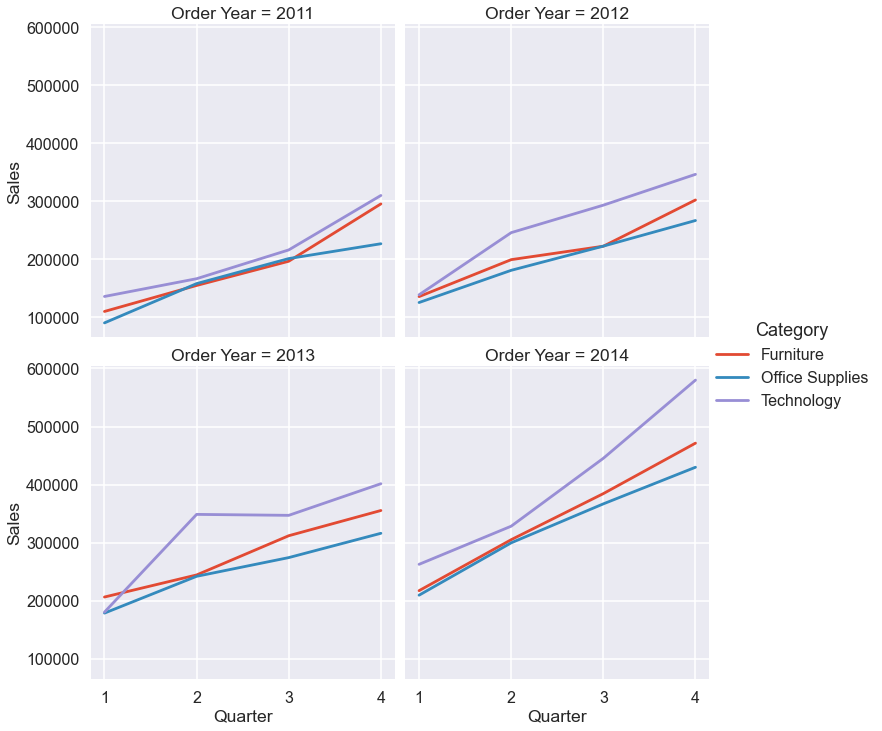

In [225]:
sns.set_style('darkgrid')

sns.relplot(data=seasonality_grouped, 
            kind='line', 
            x='Quarter', y='Sales', 
            col='Order Year',
            col_wrap=2,
            hue='Category');

So this clearly shows us that there is a clear trend in the increase of sales every year. As the year passes the Sales go up when looked from a quarterly point of view. 

Let us save and upload our work to Jovian before continuing.

## Inferences and Conclusion

So here are some of the insights that I have derived from this data exploration. 
- Global superstore operates globally in almost 150 Countries (147) and has wide range of products available for sales. 
- The major categories of products supplied are Office supplies, Technology and furniture. 
- Office supplies category accounts for the substantial amount of orders from all the order with other two being relatively close in terms of orders placed. 
- Majority of the profit for the store comes from Technology Products. The distribution of profits variable shows us why. The technology category operates in high price range. 
- Among other categories, Tables which is a sub-category of Furniture products seems to be operating at a Loss. This needs further investigation as why that is happening. 
- The top 10 countries in terms of sales are 
     1. United States
     2. Australia
     3. France
     4. China
     5. Germany
     6. Mexico
     7. India
     8. United Kingdom
     9. Indonesia
     10. Brazil
- while these might be top 10 countries the gap between first two countries in terms of sales in huge. United states accounts for majority of the sales from global superstore and some effort can be taken to increase sales in other countries. 
- among top 10 countries china and india seem to be good countries to target for increasing sales as they are producing good profits 
- The orders priority column is correlated with shipping duration as exprected. Higher the order priority lower the shipping time it takes. 
- After investigation it can be seen that the sales figures increase as the year passes. 
- Finally, the sales figures have shown linear growth over the 4 years and the business looks like its doing good. 
  

## References and Future Work

#### **Here are some links that I found useful when using these tools**
- (Jupyter markdown)[https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github]
- (pandas Documentation)[https://pandas.pydata.org/docs/user_guide/index.html#user-guide]
- (matplotlilb tutorial][https://matplotlib.org/stable/tutorials/index.html]
- (seaborn documentation)[https://seaborn.pydata.org/api.html ]

#### **Future work**
- This dataset can be used for sales forecasting
- Geospatial analysis 



In [1]:
import jovian

In [2]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "anuragpatil888825/global-superstore-sales-analysis-visualization" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/anuragpatil888825/global-superstore-sales-analysis-visualization


'https://jovian.ai/anuragpatil888825/global-superstore-sales-analysis-visualization'